In [1]:
import numpy as np
from numpy import linalg as LA
from keras.datasets import mnist, fashion_mnist
import pandas as pd
from keras.layers import Input, Dense, concatenate 
from keras.models import Model, load_model
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
from sklearn.decomposition import PCA
import glob
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras import objectives
#from MulticoreTSNE import MulticoreTSNE as TSNEGPU
import tensorflow as tf
from sklearn import manifold
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [10]:
import numpy as np
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from tensorflow import keras



def fashion_scatter(x, colors):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.patheffects as PathEffects
    # on choisit une palette de de couleur avec seaborn
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # on crée le scatter-plot
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # on ajoute les labels pour chaque digit correspondant au label
    txts = []

    for i in range(num_classes):
        # position de chaque label au milieu des points

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


def kmeans_fit(X,y_train):
    import time
    from sklearn.metrics.cluster import adjusted_mutual_info_score
    from sklearn.metrics.cluster import normalized_mutual_info_score
    from sklearn.metrics.cluster import adjusted_rand_score
    
    #(x_train_encoded, y_train), (x_test_encoded, y_train) = get_encoded_data()

    #encoded data
    k_means = KMeans(n_clusters=10, random_state=40,init='k-means++', n_init=30, max_iter=500)
    #time_start = time.time()
    k_means.fit(X)
    #print('K-means done! Time elapsed: {} seconds'.format(time.time() - time_start))
    test_clusters = k_means.labels_
  

    
    score_nmi = normalized_mutual_info_score(y_train, test_clusters)
    score_ari=adjusted_rand_score(y_train, test_clusters)
    
    #print("ami k-means encoded data: ", score_ami+0.2)
    #print("nmi k-means encoded data: ", score_ari+0.2)
    return score_ari,score_nmi
    

In [3]:
import h5py
path='D:/m2/reduc/usps.h5'
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]
maximum=0
for i in range(0,len(X_tr)):
    if(np.amax(X_tr[i])>maximum):
        maximum=np.amax(X_tr[0])
print(maximum)
x_train = X_tr.reshape((len(X_tr), np.prod(X_tr.shape[1:])))
x_test = X_te.reshape((len(X_te), np.prod(X_te.shape[1:])))
y_train=y_tr
y_test=y_te

1.0


In [6]:
def tsne(per,X,y_train):
    import time
    from sklearn.manifold import TSNE
    
    #(x_train_encoded, y_train), (x_test_encoded, y_test) = get_encoded_data()
    time_start = time.time()
    print('encoded data')
    tsne = TSNE(n_components=2, verbose=1, perplexity=per, n_iter=250)
    tsne_results = tsne.fit_transform(X)
    figure, _, _, _ = fashion_scatter(tsne_results, y_train)
    figure.show()
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

In [16]:
nombre_classe = 10
dim=256

#creation deep ae
input_img = Input(shape=(dim,), name="inp_img")

encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
bottlenek_layer=Dense(nombre_classe, activation='relu', name="bottleneck_layer")(encoded)
decoded = Dense(32, activation='relu')(bottlenek_layer)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
output = Dense(dim, activation='sigmoid', name="logits")(decoded)
  


autoencoder = Model(input_img, decoded)

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

D:\annaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


encoded data
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7291 samples in 0.023s...
[t-SNE] Computed neighbors for 7291 samples in 0.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7291
[t-SNE] Computed conditional probabilities for sample 2000 / 7291
[t-SNE] Computed conditional probabilities for sample 3000 / 7291
[t-SNE] Computed conditional probabilities for sample 4000 / 7291
[t-SNE] Computed conditional probabilities for sample 5000 / 7291
[t-SNE] Computed conditional probabilities for sample 6000 / 7291
[t-SNE] Computed conditional probabilities for sample 7000 / 7291
[t-SNE] Computed conditional probabilities for sample 7291 / 7291
[t-SNE] Mean sigma: 0.085719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.235794
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057

D:\annaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


t-SNE done! Time elapsed: 20.666933298110962 seconds


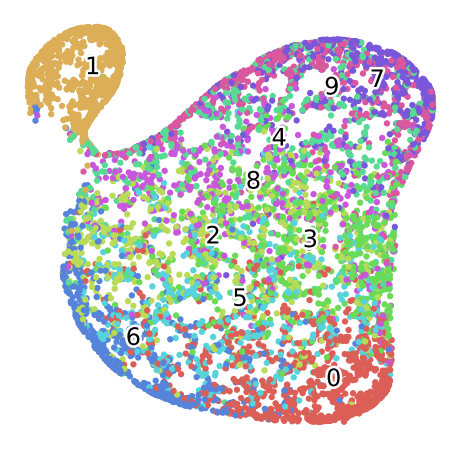

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)
ari,nmi=kmeans_fit(pca_result,y_train)
tsne(30,pca_result,y_train)

In [12]:
print("ari= ",ari)
print("nmi= ",nmi)

ari=  0.35202191820336093
nmi=  0.4491984372970025





Epoch 1/50





7291/7291 [==============================] - ETA: 1:21 - loss: 2.719 - ETA: 14s - loss: 2.371 - ETA: 6s - loss: 2.2132 - ETA: 3s - loss: 2.052 - ETA: 1s - loss: 1.949 - ETA: 0s - loss: 1.865 - 3s 452us/step - loss: 1.8343
Epoch 2/50
7291/7291 [==============================] - ETA: 0s - loss: 1.558 - ETA: 0s - loss: 1.560 - ETA: 0s - loss: 1.559 - ETA: 0s - loss: 1.550 - ETA: 0s - loss: 1.546 - ETA: 0s - loss: 1.541 - 0s 46us/step - loss: 1.5388
Epoch 3/50
7291/7291 [==============================] - ETA: 0s - loss: 1.465 - ETA: 0s - loss: 1.496 - ETA: 0s - loss: 1.510 - ETA: 0s - loss: 1.513 - ETA: 0s - loss: 1.516 - ETA: 0s - loss: 1.517 - ETA: 0s - loss: 1.517 - 0s 52us/step - loss: 1.5175
Epoch 4/50
7291/7291 [==============================] - ETA: 0s - loss: 1.534 - ETA: 0s - loss: 1.501 - ETA: 0s - loss: 1.503 - ETA: 0s - loss: 1.497 - ETA: 0s - loss: 1.505 - ETA: 0s - loss: 1.508 - 0s 48us/step - loss: 1.5061
Epoch 5/50
7291/7291 [=============================

7291/7291 [==============================] - ETA: 0s - loss: 1.045 - ETA: 0s - loss: 1.047 - ETA: 0s - loss: 1.041 - ETA: 0s - loss: 1.055 - ETA: 0s - loss: 1.058 - ETA: 0s - loss: 1.058 - ETA: 0s - loss: 1.059 - ETA: 0s - loss: 1.054 - ETA: 0s - loss: 1.049 - 0s 68us/step - loss: 1.0484
Epoch 28/50
7291/7291 [==============================] - ETA: 0s - loss: 1.046 - ETA: 2s - loss: 1.061 - ETA: 1s - loss: 1.068 - ETA: 1s - loss: 1.055 - ETA: 0s - loss: 1.050 - ETA: 0s - loss: 1.050 - ETA: 0s - loss: 1.044 - ETA: 0s - loss: 1.042 - 1s 78us/step - loss: 1.0421
Epoch 29/50
7291/7291 [==============================] - ETA: 0s - loss: 1.034 - ETA: 0s - loss: 1.041 - ETA: 0s - loss: 1.029 - ETA: 0s - loss: 1.031 - ETA: 0s - loss: 1.026 - ETA: 0s - loss: 1.027 - ETA: 0s - loss: 1.025 - 0s 57us/step - loss: 1.0244
Epoch 30/50
7291/7291 [==============================] - ETA: 0s - loss: 1.012 - ETA: 0s - loss: 1.025 - ETA: 0s - loss: 1.028 - ETA: 0s - loss: 1.017 - ETA: 0s - loss: 1.014 - 0s 4

D:\annaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


encoded data
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2007 samples in 0.053s...
[t-SNE] Computed neighbors for 2007 samples in 0.953s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2007
[t-SNE] Computed conditional probabilities for sample 2000 / 2007
[t-SNE] Computed conditional probabilities for sample 2007 / 2007
[t-SNE] Mean sigma: 0.418588
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.308456
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


D:\annaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


t-SNE done! Time elapsed: 5.3317060470581055 seconds


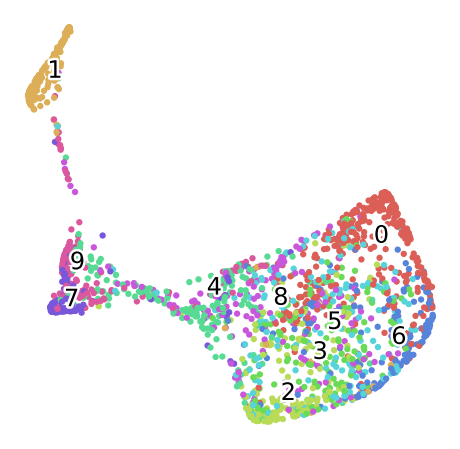

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)
ae = autoencoder.predict(x_test)
ari,nmi=kmeans_fit(ae,y_test)
tsne(30,ae,y_test)


In [19]:
print("ari= ",ari)
print("nmi= ",nmi)

ari=  0.2775537419452632
nmi=  0.443250539465251


D:\annaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


encoded data
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7291 samples in 0.002s...
[t-SNE] Computed neighbors for 7291 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7291
[t-SNE] Computed conditional probabilities for sample 2000 / 7291
[t-SNE] Computed conditional probabilities for sample 3000 / 7291
[t-SNE] Computed conditional probabilities for sample 4000 / 7291
[t-SNE] Computed conditional probabilities for sample 5000 / 7291
[t-SNE] Computed conditional probabilities for sample 6000 / 7291
[t-SNE] Computed conditional probabilities for sample 7000 / 7291
[t-SNE] Computed conditional probabilities for sample 7291 / 7291
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.465427
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057

D:\annaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


t-SNE done! Time elapsed: 18.000021934509277 seconds


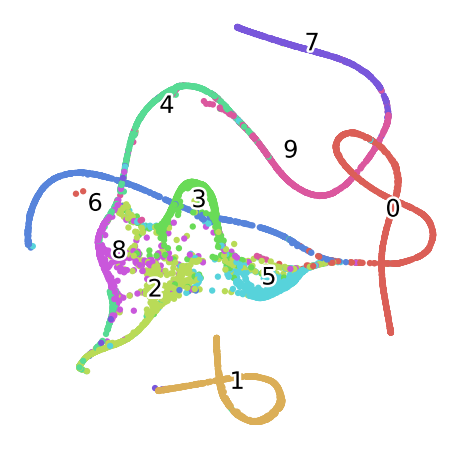

In [24]:
S = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2,
                                        eigen_solver='auto',
                                        method='standard').fit_transform(x_train)
ari,nmi=kmeans_fit(S,y_train)
tsne(30,S ,y_train)

In [23]:
print("ari= ",ari)
print("nmi= ",nmi)

ari=  0.664899141129302
nmi=  0.7426665843307118
